## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
summative_df = mouse_metadata.merge(study_results, how = 'outer', on = 'Mouse ID')
# Display the data table for preview
summative_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
summative_df['Mouse ID'].value_counts().count()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# This generates a boolean Series based upon whether the row contains a duplicate in the two given columns
repeats = summative_df.duplicated(['Mouse ID','Timepoint'],keep="first")

# Optional: Get all the data for the duplicate mouse ID.
# dup_df is the dataframe which contains all of the data from the duplicate mice
dup_df = summative_df[repeats]

# Gets the unique Mouse IDs from the duplicate dataframe and print them out
dup_mice = dup_df['Mouse ID'].unique()
print(dup_mice)

['g989']


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
 
# This loops through the duplicate dataframe and edits summative_df to remove all data from that mouse
# In this case there is only one mouse, but it would work if there were any number of mice with duplicates
for i in range(len(dup_mice)):
    summative_df = summative_df.loc[summative_df['Mouse ID'] != dup_mice[i],:]
    


In [5]:
# Checking the number of mice in the clean DataFrame.
# Display the number of mice that have duplicates and the number remaining after removal of these mice
print(len(dup_mice))
summative_df['Mouse ID'].value_counts().count()

1


248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Take the mean of the first column and creating a dataframe
sum_stat_df = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean().to_frame()

#Rename the first column
sum_stat_df = sum_stat_df.rename(columns = {'Tumor Volume (mm3)': 'Mean'})

# Populate the rest of the table
sum_stat_df['Median'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
sum_stat_df['Variance'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
sum_stat_df['Standard Deviation'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sum_stat_df['Standard Error of the Mean'] = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

sum_stat_df


,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# WOW this is a really valuable method to know.
second_stat_df = summative_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var', 'std', 'sem'])
second_stat_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice Receiving Each Drug Regimen')

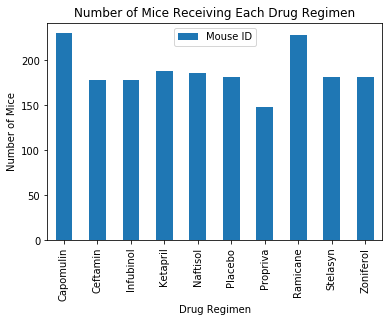

In [8]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# This row does a lot of work at once
# It groups the original dataframe by drug regimen by count, creates a dataframe, and bumps the index into a column
grouped_df = summative_df.groupby('Drug Regimen')['Mouse ID'].count().to_frame().reset_index()

# Then we plot a bar graph to visualize the number of mice in each regimen
grouped_df.plot(x='Drug Regimen', y = 'Mouse ID', kind = 'bar')
plt.ylabel('Number of Mice')
plt.title('Number of Mice Receiving Each Drug Regimen')

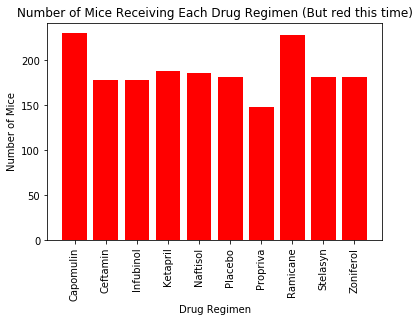

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(grouped_df['Drug Regimen'],grouped_df['Mouse ID'], color = 'red')
plt.xticks(rotation = 90)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')
plt.title('Number of Mice Receiving Each Drug Regimen (But red this time)')
plt.show()

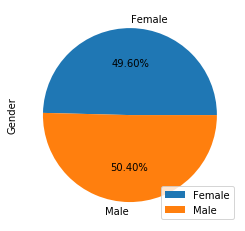

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Obtain a dataframe with one row for all unique mouse IDs
gender_df = summative_df.drop_duplicates('Mouse ID')

# Count up the number of each gender and create a dataframe
gender_df = gender_df.groupby('Sex')['Mouse ID'].count().to_frame()

# Rename the column to Gender
gender_df = gender_df.rename(columns = {'Mouse ID': 'Gender'})

# Pie chart automatically assumes 'Sum of column is the total to divide each value by'
# Autopct adds in the percentage labels
gender_df.plot(y= 'Gender',kind = 'pie', autopct='%1.2f%%')

# Move the legend for readability
plt.legend(loc = 'lower right')
plt.show()


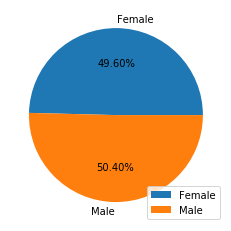

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Pass the series in as our values, assign titles to each slice, and format the string
plt.pie(gender_df['Gender'], labels = ['Female','Male'], autopct='%1.2f%%')
plt.legend(loc = 'lower right')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
